In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit keras -y
! conda install -c conda-forge openbabel -y
! pip install padelpy
! pip install git+git://github.com/hcji/PyFingerprint@master jpype1
# ! pip install rdkit rdkit keras 
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-05-14 20:51:31--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   147MB/s    in 0.6s    

2021-05-14 20:51:32 (147 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - failed with repodata from current_repodata.json, will retry with next re

In [ ]:
import os
import io
import shutil
import numpy as np
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from padelpy import from_smiles
from PyFingerprint.All_Fingerprint import get_fingerprint
from rdkit import Chem
from rdkit.Chem import Descriptors, HybridizationType, AllChem
import keras
from keras import metrics
from keras import backend as K
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, Conv1D, MaxPooling1D, AveragePooling1D, GlobalMaxPooling1D, BatchNormalization
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
DATA_SRC = "/content/drive/MyDrive/MLNS/normalized.csv"
with open(DATA_SRC, "r") as f:
  data = pd.read_csv(f)
data

,InChI Key,SMILES,Solubility
0,XLMALTXPSGQGBX-GCJKJVERSA-N,CCC(=O)OC(CC1=CC=CC=C1)(C2=CC=CC=C2)C(C)CN(C)C,0.605477
1,CUIHSIWYWATEQL-UHFFFAOYSA-N,CC1=C(C=C(C=C1)NC2=NC=CC(=N2)N(C)C3=CC4=NN(C(=...,0.381279
2,RUDATBOHQWOJDD-BSWAIDMHSA-N,CC(CCC(=O)O)C1CCC2C1(CCC3C2C(CC4C3(CCC(C4)O)C)O)C,0.622929
3,QNZCBYKSOIHPEH-UHFFFAOYSA-N,COC1=CC=C(C=C1)N2C3=C(CCN(C3=O)C4=CC=C(C=C4)N5...,0.140120
4,PTOIAAWZLUQTIO-GXFFZTMASA-N,CCC(=O)NCC1CC1C2=C3CCOC3=CC=C2,0.698748
...,...,...,...
1236,UYUXSRADSPPKRZ-SKNVOMKLSA-N,C(=O)C(C1C(C(C(=O)O1)O)O)O,0.594771
1237,SNICXCGAKADSCV-UHFFFAOYSA-N,CN1CCCC1C2=CN=CC=C2,0.680657
1238,UIDWQGRXEVDFCA-XCVCLJGOSA-N,C1C(=O)N(C(=O)N1N=CC2=CC=C(O2)[N+](=O)[O-])CO,0.635164
1239,ISWSIDIOOBJBQZ-UHFFFAOYSA-N,C1=CC=C(C=C1)O,0.869450


In [ ]:
def one_hot_fp(fp_ind, fp_len):
  fp = np.zeros(fp_len)
  for i in fp_ind:
    fp[i] = 1
  return fp

fingerprints = [ ]
morgan_fps = [ ]
maccs_fps = [ ]

k = 0
for smiles in list(data.SMILES):
  mol = Chem.MolFromSmiles(smiles)
  fp, morgan_fp, maccs_fp = None, None, None
  if mol:
    fp_ind = get_fingerprint(smiles, fp_type="pubchem")       # 881 bits
    # morgan_fp_ind = get_fingerprint(smiles, fp_type="Morgan") # 
    maccs_fp_ind = get_fingerprint(smiles, fp_type="maccs")
    morgan_fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
    fp = one_hot_fp(fp_ind, 881)
    # morgan_fp = one_hot_fp(morgan_fp_ind, 1024)
    maccs_fp = one_hot_fp(maccs_fp_ind, 1024)
    print("Done with ", k)
    k += 1
  fingerprints.append(fp)
  morgan_fps.append(morgan_fp)
  maccs_fps.append(maccs_fp)

fingerprints = np.array(fingerprints)
morgan_fps = np.array(morgan_fps)
maccs_fps = np.array(maccs_fps)
print(len(fingerprints))
# print(np.array(fingerprints_1[0]), np.array(fingerprints[0]))

# desc_fp = [ val for key, val in descriptors.items() ]

Done with  0
Done with  1
Done with  2
Done with  3
Done with  4
Done with  5
Done with  6
Done with  7
Done with  8
Done with  9
Done with  10
Done with  11
Done with  12
Done with  13
Done with  14
Done with  15
Done with  16
Done with  17
Done with  18
Done with  19
Done with  20
Done with  21
Done with  22
Done with  23
Done with  24
Done with  25
Done with  26
Done with  27
Done with  28
Done with  29
Done with  30
Done with  31
Done with  32
Done with  33
Done with  34
Done with  35
Done with  36
Done with  37
Done with  38
Done with  39
Done with  40
Done with  41
Done with  42
Done with  43
Done with  44
Done with  45
Done with  46
Done with  47
Done with  48
Done with  49
Done with  50
Done with  51
Done with  52
Done with  53
Done with  54
Done with  55
Done with  56
Done with  57
Done with  58
Done with  59
Done with  60
Done with  61
Done with  62
Done with  63
Done with  64
Done with  65
Done with  66
Done with  67
Done with  68
Done with  69
Done with  70
Done with  71
Do

KeyboardInterrupt: ignored

In [ ]:
FP_SAVE_PATH = "/content/drive/MyDrive/MLNS/fingerprints.pkl"
MORGAN_FP_SAVE_PATH = "/content/drive/MyDrive/MLNS/morgan_fps.pkl"
MACCS_FP_SAVE_PATH = "/content/drive/MyDrive/MLNS/maccs_fps.pkl"
  
# with open(FP_SAVE_PATH, "wb") as f:
#   pkl.dump(fingerprints, f)
# with open(MORGAN_FP_SAVE_PATH, "wb") as f:
#   pkl.dump(morgan_fps, f)
# with open(MACCS_FP_SAVE_PATH, "wb") as f:
#   pkl.dump(maccs_fps, f)

In [ ]:
fingerprints = pkl.load(open(FP_SAVE_PATH, "rb"))
morgan_fps = pkl.load(open(MORGAN_FP_SAVE_PATH, "rb"))
maccs_fps = pkl.load(open(MACCS_FP_SAVE_PATH, "rb"))

In [ ]:
print(np.shape(fingerprints), np.shape(morgan_fps), np.shape(maccs_fps))

(1241, 881) (1241, 2048) (1241, 1024)


In [ ]:
# np.shape(fps_np)
all = []
labels = []

main_fps = fingerprints
for k in range(len(main_fps)):
  if main_fps[k] is not None:
    all.append([[ i ] for i in main_fps[k] ])
    label = [ data.Solubility.iloc[k], ]
    labels.append( label )
print(len(all))
print(labels)
# all = fps_np

1241
[[0.6054774012630276], [0.3812785634797208], [0.6229291575128068], [0.1401195940108923], [0.6987476259463516], [0.7436141280454602], [0.5639070654264255], [0.7156702425201068], [0.6796795700066818], [0.43635127003536334], [0.6129831687361524], [0.57486357872534], [0.3751513647552239], [0.6374658676042806], [0.8193749712303028], [0.6326184177096528], [0.6894553004396433], [0.31603082429413404], [0.3795968955221983], [0.5265571446204265], [0.5133671140502167], [0.19825879316205056], [0.5382155574109326], [0.7841254161611594], [0.6807811105048612], [0.6807811105048612], [0.3917916674789767], [0.6359629009386746], [0.7153686736103467], [0.5222118186206113], [0.5325928496142269], [0.6271926956847544], [0.4304184058966595], [0.5309046876995488], [0.6121172191615929], [0.5605301924991721], [0.8544522195995495], [0.698846899173247], [0.6025641599128272], [0.5468670553482908], [0.6721138750234197], [0.6911849215898292], [0.6239714922201199], [0.5860910706276986], [0.6110989103474526], [0.4

(array([  2.,   0.,   1.,   0.,   2.,   1.,   1.,   4.,   3.,   3.,   3.,
          2.,   3.,  11.,   5.,  20.,  16.,  24.,  15.,  27.,  29.,  40.,
         26.,  30.,  28.,  67.,  89.,  38.,  39.,  47., 173., 150., 106.,
         80.,  77.,  15.,  15.,   5.,   5.,   6.,  19.,   5.,   5.,   2.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

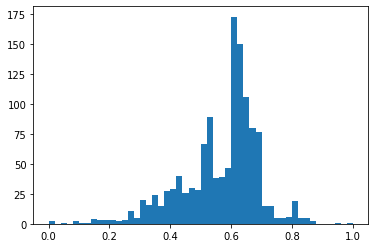

In [ ]:
plt.hist(data.Solubility, bins=50)

In [ ]:
X = np.array(all)
np.shape(X)

(1241, 881, 1)

In [ ]:
model = Sequential()
model.add(
    Conv1D(9, 9, input_shape=np.shape(X)[1:])
)
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.8))
model.add(AveragePooling1D(2))
model.add(Dense(1, activation="linear"))
model.add(
    Conv1D(18, 9)
)
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.8))
model.add(AveragePooling1D(2))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 873, 9)            90        
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 873, 9)            0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 873, 9)            36        
_________________________________________________________________
dropout_11 (Dropout)         (None, 873, 9)            0         
_________________________________________________________________
average_pooling1d_11 (Averag (None, 436, 9)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 436, 1)            10        
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 428, 18)          

In [ ]:
def R2Score(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [ ]:
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(), metrics=["mse", R2Score ])

In [ ]:
batch_size = 64
epochs = 10
# split_i = 1100
# test_X = X[split_i:]
# train_X = X[:split_i]
# train_Y = train_labels[:split_i]
# test_Y = train_labels[split_i:]

# train_X, valid_X, train_Y, valid_Y = train_test_split(X, [ [ i, ] for i in labels ])
# train_X, valid_X, train_Y, valid_Y = train_test_split(X, [ [ i, ] for i in labels], test_size=0.2)
train_X, valid_X, train_Y, valid_Y = train_test_split(X, labels, test_size=0.2)
train_Y, valid_Y = np.array(train_Y), np.array(valid_Y)

In [ ]:
total_iters = 50
SAVE_SRC = "/content/training_1/"
SAVE_DST = "/content/drive/MyDrive/MLNS/training_1/"

for i in range(total_iters):
  num = 20
  checkpoint_path = SAVE_DST + "cp" + str(num) + ".ckpt"
  checkpoint_dir = os.path.dirname(checkpoint_path)

  # Create a callback that saves the model's weights
  cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                  save_weights_only=True,
                                                  verbose=1)
  # model.load_weights(checkpoint_path)
  train = model.fit(train_X, train_Y, batch_size=batch_size, epochs=epochs, verbose=1,validation_data=(valid_X, valid_Y), callbacks=cp_callback)


  # if os.path.exists(SAVE_DST):
  #   shutil.rmtree(SAVE_DST)
  # shutil.copytree(SAVE_SRC, SAVE_DST + "num/")

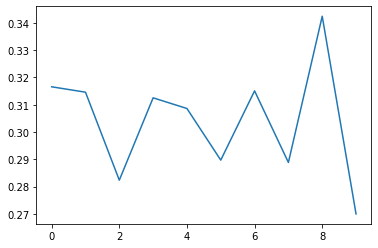

In [ ]:
plt.plot(range(len(train.history['loss'])), train.history['R2Score'])